<a href="https://colab.research.google.com/github/amir-asari/AIDroneWorkshop-24-01-2022-/blob/main/Group4_Frontal_VS_Side_View_(without_mask)_(90_10)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  ## Setup
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

!pip install zipfile
from zipfile import ZipFile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [ ]:
## Download data from gdrive link
! gdown --id 1JLxmrftssqDKPeyFFs_iMIy_Dio1727C

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JLxmrftssqDKPeyFFs_iMIy_Dio1727C
To: /content/DatasetG4.zip
100% 22.5M/22.5M [00:00<00:00, 213MB/s]


In [ ]:
## Unzip downloaded file
with ZipFile('/content/DatasetG4.zip','r') as zipObj:
  zipObj.extractall()

## **DATA SPLITTING INTO 90% TRAINING DATA AND 10% TESTING DATA**

In [ ]:
## Load data using Keras utility
## Define parameters
batch_size = 50
img_height = 224
img_width = 224

## Data splitting, into 90% training data and 10% testing data
# Define the path to dataset directory
dataset_dir = '/content/DatasetG4'

# Define the path to the directory to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.1

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

Streaming output truncated to the last 5000 lines.
/content/DatasetG4/Side View/20210608_091305.jpg
/content/output/train/Side View/20210608_091305.jpg
/content/DatasetG4/Side View/20210610_202030.jpg
/content/output/train/Side View/20210610_202030.jpg
/content/DatasetG4/Side View/D6 - 1.jpg
/content/output/train/Side View/D6 - 1.jpg
/content/DatasetG4/Side View/IMG_1885.jpg
/content/output/train/Side View/IMG_1885.jpg
/content/DatasetG4/Side View/D8 - 1.jpg
/content/output/train/Side View/D8 - 1.jpg
/content/DatasetG4/Side View/IMG_20210603_180725.jpg
/content/output/train/Side View/IMG_20210603_180725.jpg
/content/DatasetG4/Side View/1623591295450.jpg
/content/output/train/Side View/1623591295450.jpg
/content/DatasetG4/Side View/20210611_203407.jpg
/content/output/train/Side View/20210611_203407.jpg
/content/DatasetG4/Side View/1 day 8.jpg
/content/output/train/Side View/1 day 8.jpg
/content/DatasetG4/Side View/IMG_20210604_194335.jpg
/content/output/train/Side View/IMG_20210604_1943

In [ ]:
# Define the path to the subfolder containing the images
test_front_view_path = '/content/output/test/Front View'
test_side_view_path = '/content/output/test/Side View'
train_front_view_path = '/content/output/train/Front View'
train_side_view_path = '/content/output/train/Side View'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_front_view_path) if os.path.isfile(os.path.join(test_front_view_path, name))])
num_images2 = len([name for name in os.listdir(test_side_view_path) if os.path.isfile(os.path.join(test_side_view_path, name))])
num_images3 = len([name for name in os.listdir(train_front_view_path) if os.path.isfile(os.path.join(train_front_view_path, name))])
num_images4 = len([name for name in os.listdir(train_side_view_path) if os.path.isfile(os.path.join(train_side_view_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test/Front View: {num_images1}")
print(f"Number of images in the test/Side View: {num_images2}")
print(f"Number of images in the train/Front View: {num_images3}")
print(f"Number of images in the train/Side View: {num_images4}")

Number of images in the test/Front View: 149
Number of images in the test/Side View: 150
Number of images in the train/Front View: 1334
Number of images in the train/Side View: 1346


In [ ]:
# data_dir = '/content/DatasetG4'
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# validation_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# Create an instance of the ImageDataGenerator with for training and testing
train_data_generator = ImageDataGenerator( validation_split=0.2) # 20% from training will be leaved out for validation
test_data_generator = ImageDataGenerator()

names = ["Front View" , "Side View"]  #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 2145 images belonging to 2 classes.
Found 535 images belonging to 2 classes.
Found 299 images belonging to 2 classes.


## **DATA VISUALISATION**

(50, 224, 224, 3)
(50,)


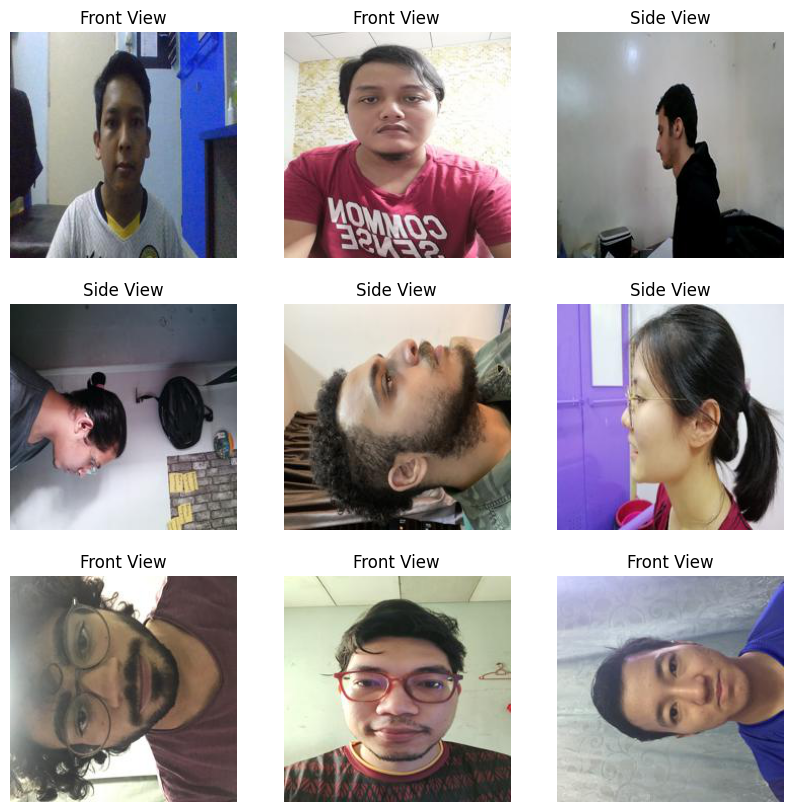

In [ ]:
## Visualize the data
import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

In [ ]:
## Create the base model from the pre-trained VGG16
## First, instantiate a VGG16 model pre-loaded with weights trained on ImageNet.

base_model = tf.keras.applications.VGG16()

# print(type(base_model))
print("****VGG16 original network arhitecture****")
base_model.summary()

553467096/553467096 [==============================] - 2s 0us/step
****VGG16 original network arhitecture****
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                 

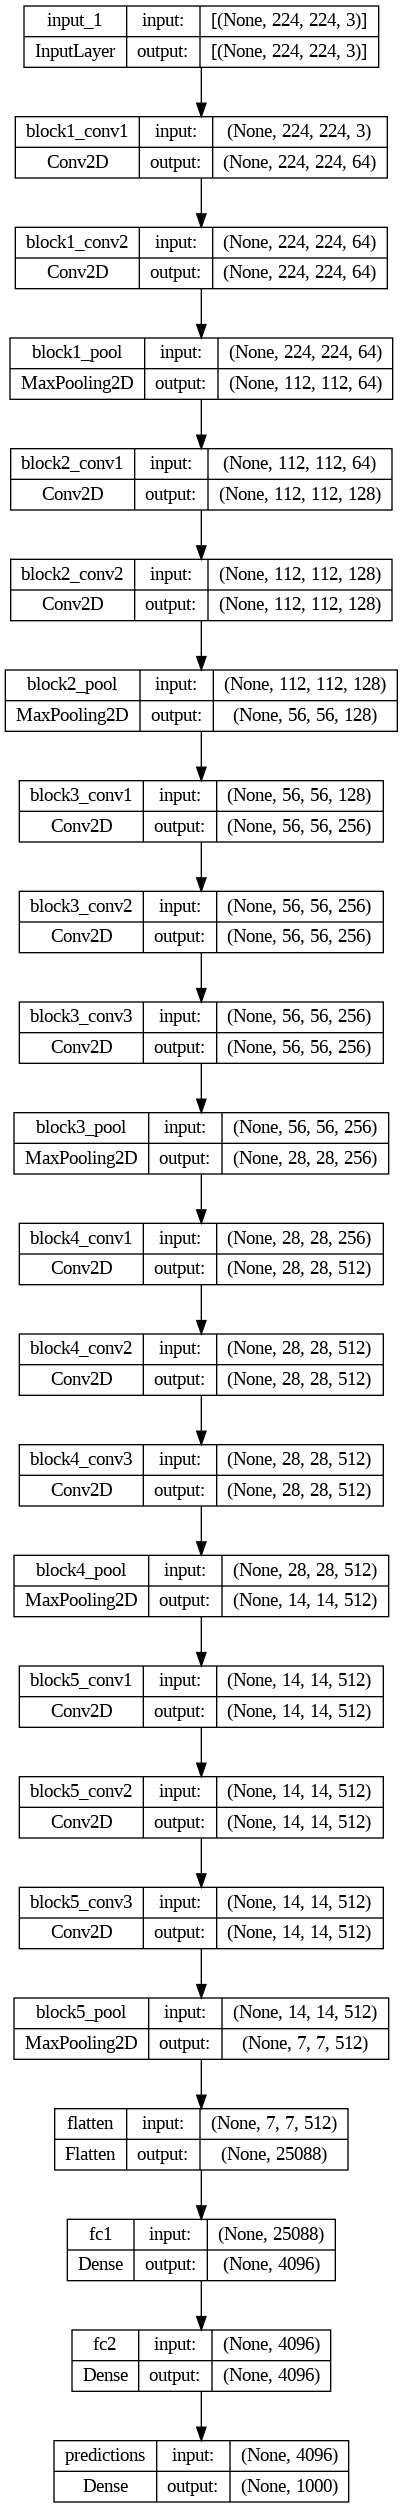

In [ ]:
tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemodel.png', show_shapes = True)

## **Freeze parameters of all layers except the last and second layers**

In [ ]:
#Create our model by copying from the 1st layer to the 3rd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

  #Freezing the existing weights
for layer in model.layers[0:-1]:
    layer.trainable = False

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

In [ ]:
## Compile and Train model
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
43/43 [==============================] - 1050s 24s/step - loss: 1.2612 - accuracy: 0.9361 - val_loss: 0.2626 - val_accuracy: 0.9664
Epoch 2/5
43/43 [==============================] - 1100s 26s/step - loss: 0.0235 - accuracy: 0.9967 - val_loss: 0.0887 - val_accuracy: 0.9869
Epoch 3/5
43/43 [==============================] - 1104s 26s/step - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.0941 - val_accuracy: 0.9888
Epoch 4/5
43/43 [==============================] - 1100s 26s/step - loss: 3.0417e-04 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9888
Epoch 5/5
43/43 [==============================] - 1087s 25s/step - loss: 2.4049e-06 - accuracy: 1.0000 - val_loss: 0.0836 - val_accuracy: 0.9888


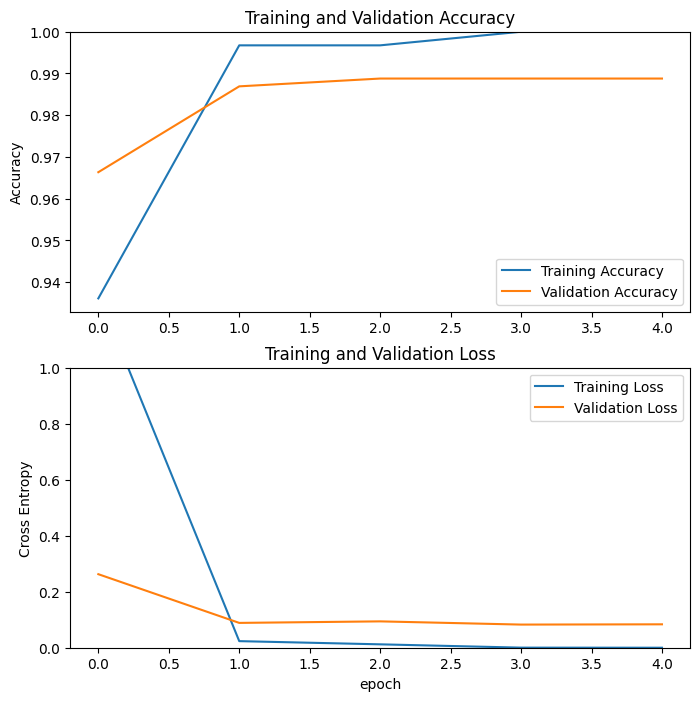

In [ ]:
## Plotting the learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
## Testing the model
# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

6/6 [==============================] - 113s 19s/step - loss: 1.8371e-05 - accuracy: 1.0000
Test accuracy: 1.0


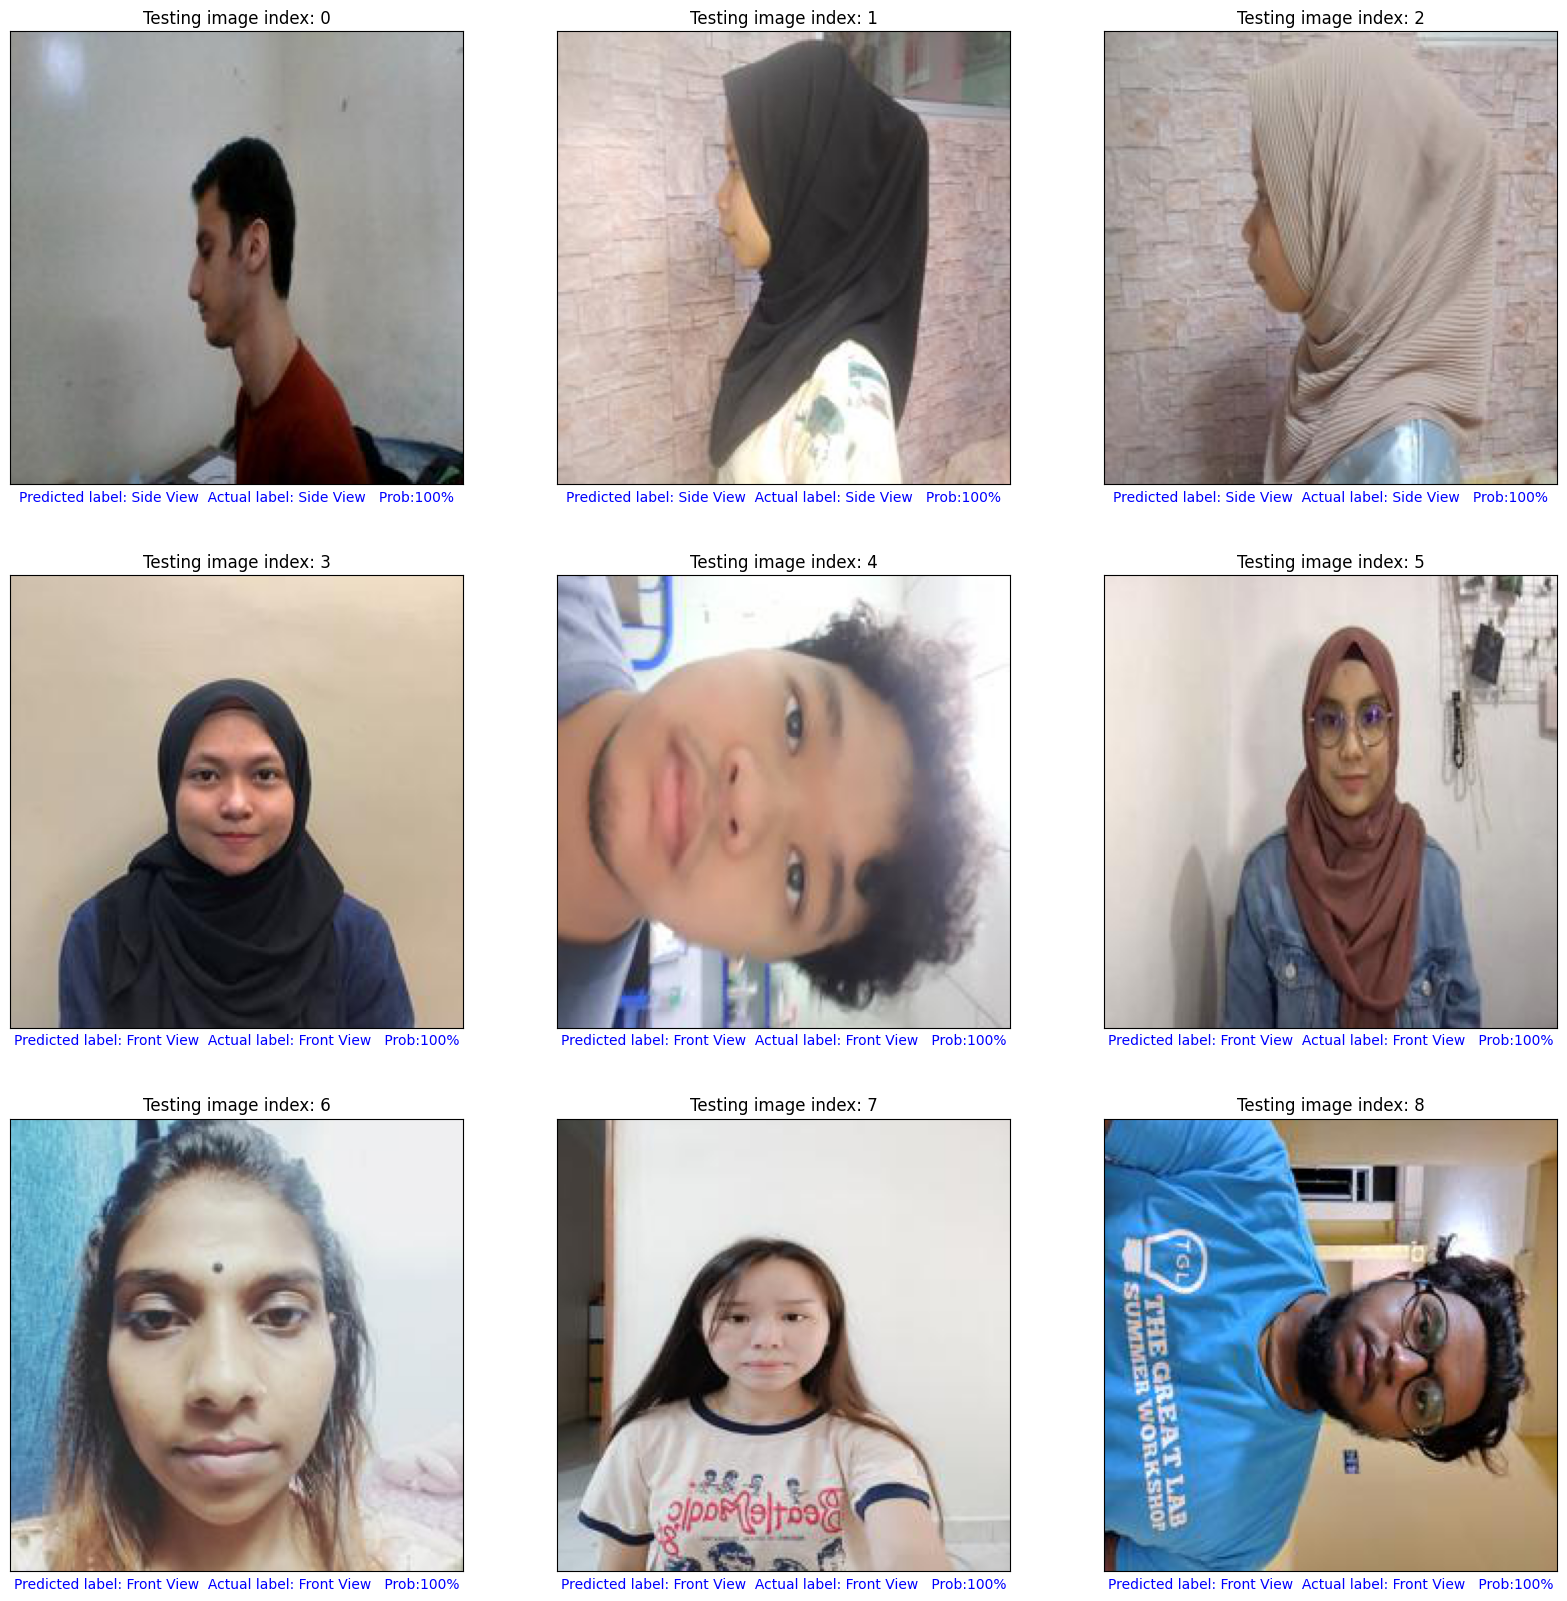

In [ ]:
## Data visualisation
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(20, 20))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))